In [14]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [5]:
gapminder = pd.read_csv('gapminder.csv')

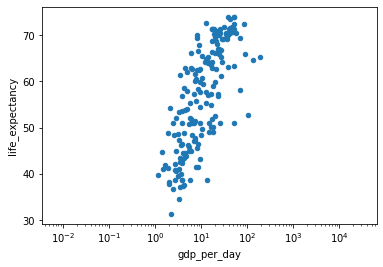

In [7]:
def plotyear(year): 
    data = gapminder[gapminder.year==year]
    data.plot.scatter('gdp_per_day','life_expectancy', logx=True)
    
plotyear(1965)

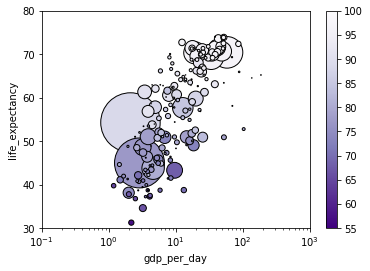

In [20]:
def plotyear(year): 
    data = gapminder[gapminder.year==year].sort_values('population', ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    
    
    data.plot.scatter('gdp_per_day','life_expectancy', logx=True, s=area,
                     linewidths=1,edgecolors='k', c=color, colormap=matplotlib.cm.get_cmap('Purples_r'),
                     vmin=55, vmax=100, sharex=False)
    plt.axis(ymin=30,ymax=80, xmin=1e-1, xmax=1e3)
    
plotyear(1965)

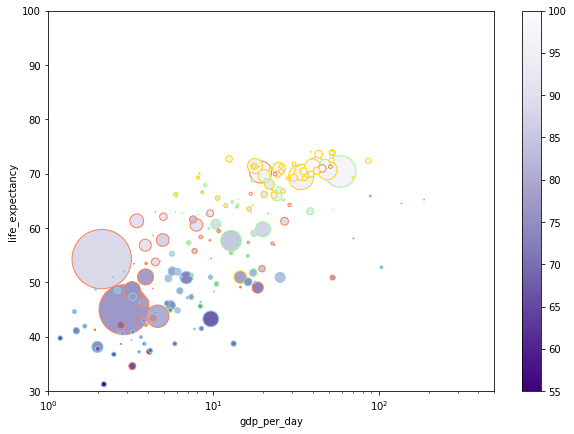

In [28]:
def plotyear(year): 
    data = gapminder[gapminder.year==year].sort_values('population', ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue', 'Europe' : 'gold',
                                 'America':'palegreen', 'Asia': 'coral'})
    
    
    data.plot.scatter('gdp_per_day','life_expectancy', logx=True, s=area,
                     linewidths=1,edgecolors=edgecolor, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'),vmin=55, vmax=100,
                      sharex=False, figsize=(10, 7))
    plt.axis(ymin=30,ymax=100, xmin=1, xmax=500)
    
plotyear(1965)

In [29]:
interact(plotyear,year=range(1965,2016,10))

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), …

<function __main__.plotyear(year)>

In [30]:
interact(plotyear, year=widgets.IntSlider(min=1950, max=2015, step=1,value=1965))

interactive(children=(IntSlider(value=1965, description='year', max=2015, min=1950), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

In [31]:
gapminder[gapminder.year==2015].population.sum()

7292414176.0

In [32]:
gapminder[gapminder.year==2015].groupby('region').population.sum()

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

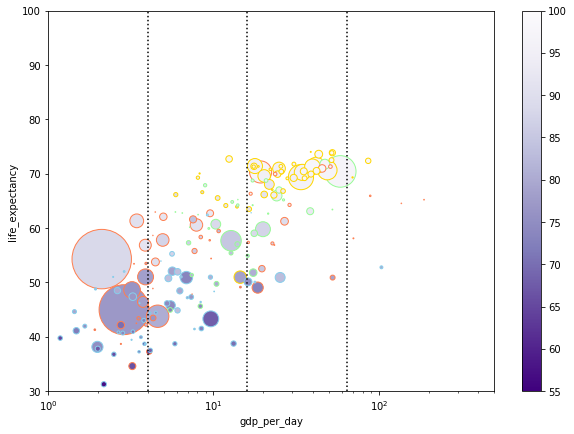

In [33]:
def plotyear(year): 
    data = gapminder[gapminder.year==year].sort_values('population', ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue', 'Europe' : 'gold',
                                 'America':'palegreen', 'Asia': 'coral'})
    
    
    data.plot.scatter('gdp_per_day','life_expectancy', logx=True, s=area,
                     linewidths=1,edgecolors=edgecolor, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'),vmin=55, vmax=100,
                      sharex=False, figsize=(10, 7))
    #Levels of the gdp_per_day (belov 4$ - extreme poverty)
    for level in [4,16,64]:
        plt.axvline(level, linestyle=':', color='k')
    
    plt.axis(ymin=30,ymax=100, xmin=1, xmax=500)
    
plotyear(1965)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001460E5B1D48>,
      dtype=object)

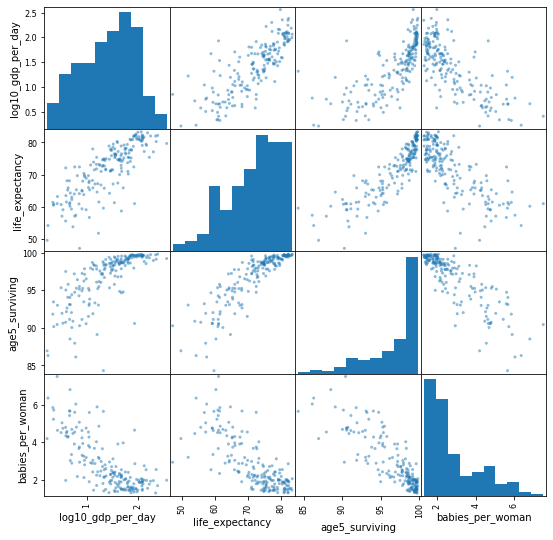

In [38]:
gapminder['log10_gdp_per_day'] = np.log10(data['gdp_per_day'])
data = gapminder.loc[gapminder.year == 2015,['log10_gdp_per_day','life_expectancy','age5_surviving','babies_per_woman']]


pandas.plotting.scatter_matrix(data,figsize=(9,9))